### Wine rating classification

In [461]:
import importlib

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDecisionTreeClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation as myevaluation
importlib.reload(mysklearn.myevaluation)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [462]:
mpt = MyPyTable()
filename = "input_data/WineRatings.csv"
mpt.load_from_file(filename)
# set the Name column because didn't load properly
mpt.column_names[0] = 'Name'

Investigate missing values, missing values in the dataset are denoted as "N.V."

In [463]:
# count the missing values in the dataset
count = myutils.count_nv(mpt.data)
name_col = mpt.get_column('Name')
dataset_len = len(name_col)
print(f'Out of {dataset_len} rows, there are {count} rows with missing data')

mpt.replace_missing_values_with_column_average('Price')
mpt.replace_missing_values_with_column_average('Rating')
mpt.replace_missing_values_with_column_average('Year')
summary_table = mpt.compute_summary_statistics(["Price", "Rating", "Year"])
summary_table.pretty_print()

Out of 13834 rows, there are 744 rows with missing data
attribute        min      max      mid         avg    median
-----------  -------  -------  -------  ----------  --------
Price           3.15  3410.79  1706.97    33.0249      15.95
Rating          2.2      4.9      3.55     3.86566      3.9
Year         1961     2020     1990.5   2015.53      2016


In [464]:
print('column names', mpt.column_names)

name_col = mpt.get_column('Name')
country_col = mpt.get_column('Country')
region_col = mpt.get_column('Region')
winery_col = mpt.get_column('Winery')
rating_col = mpt.get_column('Rating')
num_ratings_col = mpt.get_column('NumberOfRatings')
price_col = mpt.get_column('Price')
year_col = mpt.get_column('Year')
winestyle_col = mpt.get_column('Winestyle')

unique_names = myutils.get_unique_labels(name_col)
unique_countries = myutils.get_unique_labels(country_col)
unique_regions = myutils.get_unique_labels(region_col)
unique_wineries = myutils.get_unique_labels(winery_col)
unique_ratings = myutils.get_unique_labels(rating_col)
unique_num_ratings = myutils.get_unique_labels(num_ratings_col)
unique_prices = myutils.get_unique_labels(price_col)
unique_years = myutils.get_unique_labels(year_col)
unique_winestyles = myutils.get_unique_labels(winestyle_col)

myutils.display_num_unique_labels(unique_names, 'names') 
myutils.display_num_unique_labels(unique_countries, 'countries')
myutils.display_num_unique_labels(unique_regions, 'regions')
myutils.display_num_unique_labels(unique_wineries, 'wineries')
myutils.display_num_unique_labels(unique_ratings, 'ratings')
myutils.display_num_unique_labels(unique_num_ratings, 'number Of Ratings')
myutils.display_num_unique_labels(unique_prices, 'prices')
myutils.display_num_unique_labels(unique_years, 'years')
myutils.display_num_unique_labels(unique_winestyles, 'winestyles')
# discretize ratings, prices, years, countries

column names ['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings', 'Price', 'Year', 'Winestyle']
There are 10934 unique names
There are 33 unique countries
There are 861 unique regions
There are 3505 unique wineries
There are 26 unique ratings
There are 1821 unique number Of Ratings
There are 3008 unique prices
There are 33 unique years
There are 4 unique winestyles


#### Make class distribution chart

[4.2, 4.3, 3.9, 3.5, 3.9, 3.7, 4.0, 3.9, 3.6, 3.5, 3.9, 4.3, 4.1, 3.6, 3.7, 3.2, 4.2, 4.3, 3.8, 4.0, 3.4, 3.7, 4.2, 2.9, 4.3, 4.2, 4.4, 3.7, 3.6, 3.9, 3.3, 3.9, 4.4, 3.7, 4.1, 3.8, 3.6, 4.2, 3.5, 4.2, 4.0, 3.7, 3.8, 4.0, 3.7, 3.3, 4.1, 3.8, 3.7, 3.8, 3.9, 4.2, 3.6, 3.8, 3.6, 3.9, 4.0, 4.6, 3.3, 4.4, 3.8, 3.8, 3.7, 4.0, 4.0, 4.3, 3.6, 4.4, 4.3, 3.6, 4.0, 3.8, 4.2, 3.8, 3.7, 4.1, 3.7, 4.0, 3.9, 3.9, 3.4, 3.9, 3.9, 4.1, 3.6, 3.5, 3.9, 4.4, 3.5, 3.7, 3.4, 3.7, 4.1, 3.6, 3.8, 3.6, 4.2, 3.7, 3.7, 3.9, 3.7, 3.8, 4.4, 4.2, 4.3, 4.1, 4.0, 4.1, 3.4, 3.9, 3.7, 4.4, 4.1, 3.6, 4.1, 3.4, 4.0, 4.1, 3.7, 4.1, 4.1, 4.2, 4.4, 4.6, 3.2, 4.4, 3.9, 3.6, 3.5, 3.9, 4.5, 4.4, 3.9, 3.8, 4.3, 4.1, 4.2, 3.8, 4.3, 4.0, 4.3, 3.7, 3.7, 3.8, 4.1, 3.5, 4.0, 4.3, 3.4, 4.4, 4.0, 3.2, 4.1, 4.1, 4.0, 4.1, 3.7, 3.8, 3.6, 3.8, 4.0, 3.8, 4.3, 4.0, 3.2, 4.2, 3.6, 3.5, 4.6, 3.2, 4.2, 3.7, 4.0, 4.2, 3.3, 4.5, 3.5, 3.9, 3.6, 4.0, 3.8, 4.3, 3.8, 3.7, 4.1, 3.9, 3.4, 4.2, 3.9, 3.6, 4.1, 3.9, 3.8, 3.8, 3.5, 3.4, 3.7, 4.1, 3.5, 3.4,

/tmp/ipykernel_3118/3660453848.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating_col, palette="coolwarm")


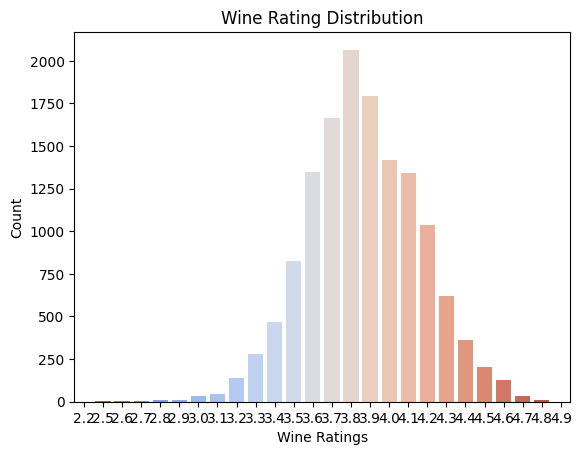

In [465]:
# convert rating col to integers
# rating_col = [int(r) for r in rating_col if r != 'N.V.'] # exclude missing vals
print(rating_col)
print(len(rating_col))
print('The minimum rating is', min(rating_col))
print('The maximum rating is', max(rating_col))

# plot the class distribution
plt.figure()
sns.countplot(x=rating_col, palette="coolwarm")
plt.title("Wine Rating Distribution")
plt.xlabel("Wine Ratings")
plt.ylabel("Count")
plt.show()

### Attribue distribution charts before discretization

In [466]:
# # price
# plt.figure()
# sns.countplot(x=price_col, palette="coolwarm")
# plt.title("Wine Price Distribution")
# plt.xlabel("Wine Prices")
# plt.ylabel("Count")
# plt.show()
# print(f'Prices range from {min(price_col)} to {max(price_col)}')

# # year
# plt.figure()
# sns.countplot(x=year_col, palette="coolwarm")
# plt.title("Wine Year Distribution")
# plt.xlabel("Years")
# plt.ylabel("Count")
# plt.show()
# print(f'Years range from {min(year_col)} to {max(year_col)}')

# # countries
# plt.figure()
# sns.countplot(x=country_col, palette="coolwarm")
# plt.title("Wine Countries Distribution")
# plt.xlabel("Countries")
# plt.ylabel("Count")
# plt.show()

# # number of ratings
# plt.figure()
# sns.countplot(x=num_ratings_col, palette="coolwarm")
# plt.title("Number of Ratings Distribution")
# plt.xlabel("Number of ratings")
# plt.ylabel("Count")
# plt.show()
# print(f'Number of ratings range from {min(num_ratings_col)} to {max(num_ratings_col)}')

### Attribute distributions after discretization

/tmp/ipykernel_3118/3276158286.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ratings_discretized, order=ratings_order, palette="coolwarm")


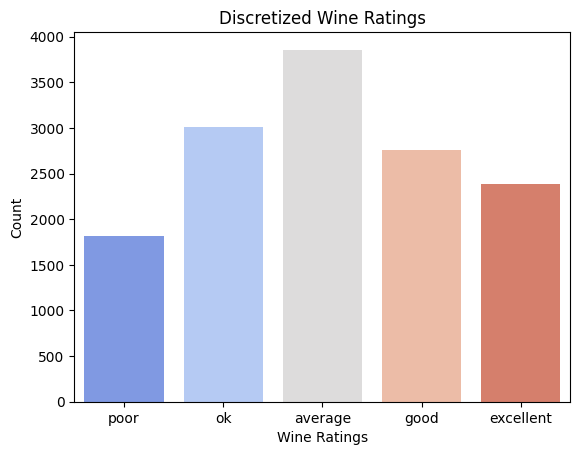

/tmp/ipykernel_3118/3276158286.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=prices_discretized, order=prices_order, palette="coolwarm")


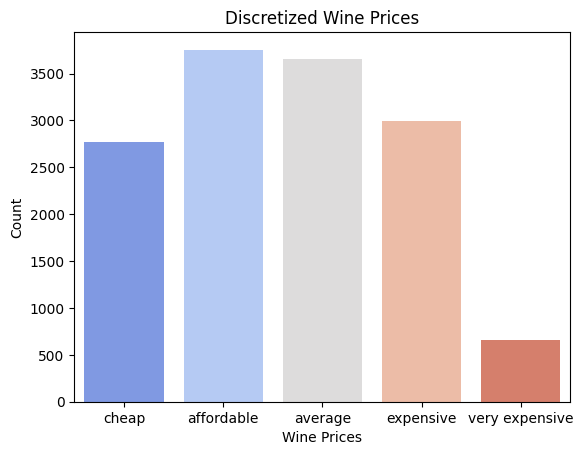

/tmp/ipykernel_3118/3276158286.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=years_discretized, order=years_order, palette="coolwarm")


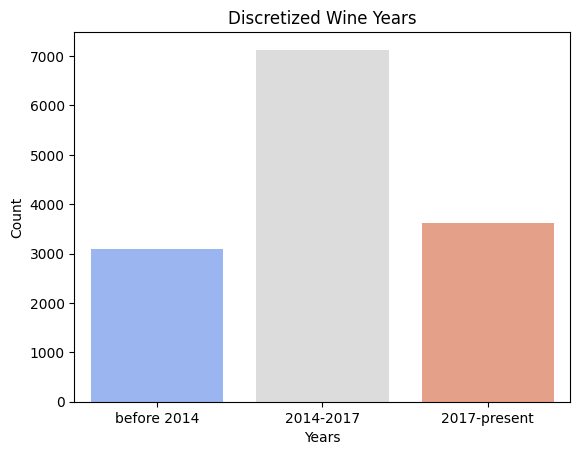

/tmp/ipykernel_3118/3276158286.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=num_ratings_discretized, order=num_ratings_order, palette="coolwarm")


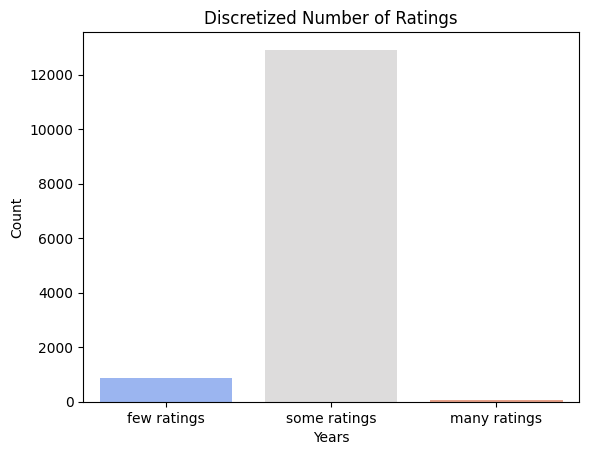

In [467]:
ratings_order = ['poor', 'ok', 'average', 'good', 'excellent']
ratings_discretized = [myutils.rating_discretizer(rating_col[i]) for i in range(len(rating_col))]
# plot ratings discretized
plt.figure()
sns.countplot(x=ratings_discretized, order=ratings_order, palette="coolwarm")
plt.title("Discretized Wine Ratings")
plt.xlabel("Wine Ratings")
plt.ylabel("Count")
plt.show()

prices_order = ["cheap", "affordable", "average", "expensive", "very expensive"]
prices_discretized = [myutils.price_discretizer(price_col[i]) for i in range(len(price_col))]
# plot prices discretized
plt.figure()
sns.countplot(x=prices_discretized, order=prices_order, palette="coolwarm")
plt.title("Discretized Wine Prices")
plt.xlabel("Wine Prices")
plt.ylabel("Count")
plt.show()

years_order = ["before 2014", "2014-2017", "2017-present"]
years_discretized = [myutils.year_discretizer(year_col[i]) for i in range(len(year_col))]
# plot years discretized
plt.figure()
sns.countplot(x=years_discretized, order=years_order, palette="coolwarm")
plt.title("Discretized Wine Years")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

num_ratings_order = ["few ratings", "some ratings", "many ratings"]
num_ratings_discretized = [myutils.num_ratings_discretizer(num_ratings_col[i]) for i in range(len(num_ratings_col))]
# plot number of ratings discretized
plt.figure()
sns.countplot(x=num_ratings_discretized, order=num_ratings_order, palette="coolwarm")
plt.title("Discretized Number of Ratings")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

In [468]:
k = 5 # TODO

price_year_num_ratings = myutils.combine_cols(prices_discretized, years_discretized, num_ratings_discretized)
X_train = myutils.reformat_cols(price_year_num_ratings, prices_discretized, years_discretized, num_ratings_discretized)
y_train = ratings_discretized

naive_bayes_classifier = MyNaiveBayesClassifier()
mean_naive_bayes_acc, mean_naive_bayes_err = myevaluation.random_subsample(X_train, y_train, k, naive_bayes_classifier)
print('Naive bayes mean accuracy:', mean_naive_bayes_acc, 'Mean naive bayes error:', mean_naive_bayes_err)

decision_tree_classifier = MyDecisionTreeClassifier()
mean_decision_tree_acc, mean_decision_tree_err = myevaluation.random_subsample(X_train, y_train, k, decision_tree_classifier)
print('Decision tree mean accuracy:', mean_decision_tree_acc, 'Decision tree mean error:', mean_decision_tree_err)

# random_forest_classifier = MyRandomForestClassifier()
# mean_random_forest_acc, mean_random_forest_err = myevaluation.random_subsample(X_train, y_train, k, random_forest_classifier, N=20, M=5, F=2)
# print('Random forest mean accuracy:', mean_random_forest_acc, 'Random forest mean error:', mean_random_forest_err)

# knn_classifier = MyKNeighborsClassifier()
# mean_knn_accuracy, mean_knn_error = myevaluation.random_subsample(X_train, y_train, k, knn_classifier)

Naive bayes mean accuracy: 0.2798446266724212 Mean naive bayes error: 0.7201553733275787
Decision tree mean accuracy: 0.2799309451877428 Decision tree mean error: 0.7200690548122572


### Pickle decision tree

In [469]:
import tree_pickler
import wine_app
importlib.reload(tree_pickler)
importlib.reload(wine_app)

tree_pickler.save_tree(['Price', 'Year', 'NumberOfRatings'], decision_tree_classifier.tree, y_train)

## Data Preprocessing

In [470]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load your data
df = pd.read_csv('input_data/WineRatings.csv')

# Handling outliers with simple capping
df['Price'] = df['Price'].clip(lower=0, upper=df['Price'].quantile(0.95))
df['NumberOfRatings'] = df['NumberOfRatings'].clip(upper=df['NumberOfRatings'].quantile(0.95))

# Scaling numerical features
scaler = MinMaxScaler()
df[['Price', 'NumberOfRatings']] = scaler.fit_transform(df[['Price', 'NumberOfRatings']])

# One-hot encoding categorical variables
encoder = OneHotEncoder()  # Default returns a sparse matrix
categorical_columns = ['Country', 'Region', 'Winery', 'Winestyle']
encoded_data = encoder.fit_transform(df[categorical_columns]).toarray()  # Convert to dense array
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded data with the original dataframe
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Save the preprocessed dataframe back to a new CSV file if needed
# df.to_csv('output_data/PreprocessedWineRatings.csv', index=False) 

# Display the first few rows to confirm changes
print(df.head())

                                 Name  Rating  NumberOfRatings     Price  \
0                        Pomerol 2011     4.2         0.052167  0.968371   
1                          Lirac 2017     4.3         0.052167  0.130206   
2  Erta e China Rosso di Toscana 2015     3.9         0.052167  0.045335   
3                      Bardolino 2019     3.5         0.052167  0.058724   
4      Ried Scheibner Pinot Noir 2016     3.9         0.052167  0.274117   

   Year  Country_Argentina  Country_Australia  Country_Austria  \
0  2011                0.0                0.0              0.0   
1  2017                0.0                0.0              0.0   
2  2015                0.0                0.0              0.0   
3  2019                0.0                0.0              0.0   
4  2016                0.0                0.0              1.0   

   Country_Brazil  Country_Bulgaria  ...  Winery_Ànima Negra  \
0             0.0               0.0  ...                 0.0   
1             0.0 

In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("output_data/PreprocessedWineRatings.csv")
df = pd.read_csv("input_data/WineRatings.csv")

# Check and drop non-numeric columns only if they exist in the DataFrame
non_numeric_columns = ['Name', 'Year', 'Winestyle']  # Including 'Winestyle' if it's not numeric
columns_to_drop = [col for col in non_numeric_columns if col in df.columns]
df.drop(columns_to_drop, inplace=True, axis=1)

# Create a new 'Winestyle' column based on the binary style columns
conditions = [
    (df['Winestyle_Red'] == 1),
    (df['Winestyle_Rose'] == 1),
    (df['Winestyle_Sparkling'] == 1),
    (df['Winestyle_White'] == 1)
]
choices = ['Red', 'Rose', 'Sparkling', 'White']
df['Winestyle'] = np.select(conditions, choices, default='Unknown')  # Update: use np.select

# Select only numeric columns for the correlation matrix calculation
numeric_df = df.select_dtypes(include=[np.number])

# Histograms for numerical features
df[['Rating', 'Price']].hist(bins=30, figsize=(10, 5))
plt.show()

# Scatter plot for Price vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs. Rating')
plt.show()

# Box plot for Rating by Winestyle
plt.figure(figsize=(8, 5))
sns.boxplot(x='Winestyle', y='Rating', data=df)
plt.title('Rating by Wine Type')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

KeyError: 'Winestyle_Red'